In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv("housing1.csv")


In [82]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [83]:
#check for Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
#drop null values
data.dropna(inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [86]:
#Split data into X and Y 
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [87]:
#Split data into training and testing data. Use 80% of the data to train the model on and test accuracy of prediction on remaining 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [88]:
#Combine training data using join command
train_data = X_train.join(y_train)

In [68]:
train_data.drop(['ocean_proximity'], axis=1, inplace = True)

In [89]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20019,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,INLAND,99200.0
13467,-117.39,34.12,7.0,5059.0,780.0,3253.0,801.0,4.9196,INLAND,140500.0
17921,-121.99,37.35,25.0,1527.0,325.0,707.0,339.0,4.3750,<1H OCEAN,212200.0
19812,-118.94,36.32,10.0,2271.0,398.0,986.0,358.0,4.0703,INLAND,147100.0
20100,-120.23,37.96,52.0,1230.0,262.0,609.0,243.0,2.0057,INLAND,68200.0
...,...,...,...,...,...,...,...,...,...,...
430,-122.28,37.88,52.0,1172.0,215.0,489.0,218.0,3.9167,NEAR BAY,235600.0
17068,-122.24,37.55,3.0,6164.0,1175.0,2198.0,975.0,6.7413,NEAR BAY,435900.0
8562,-118.41,33.92,38.0,1437.0,272.0,590.0,250.0,5.2338,<1H OCEAN,358000.0
11306,-117.94,33.78,11.0,2880.0,745.0,1806.0,722.0,3.8056,<1H OCEAN,171100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

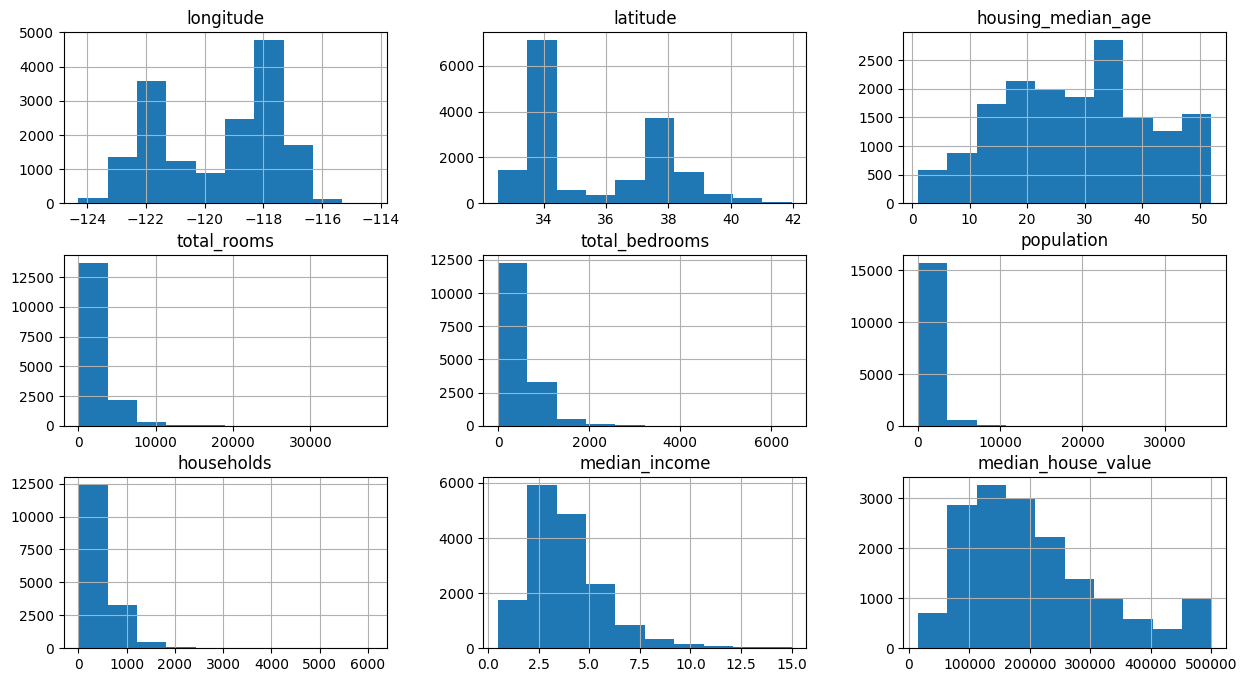

In [90]:
#Look for correlation using graphs
train_data.hist(figsize=(15, 8))

In [91]:
#create correlation matrix
train_data.corr()

ValueError: could not convert string to float: 'INLAND'

<Axes: >

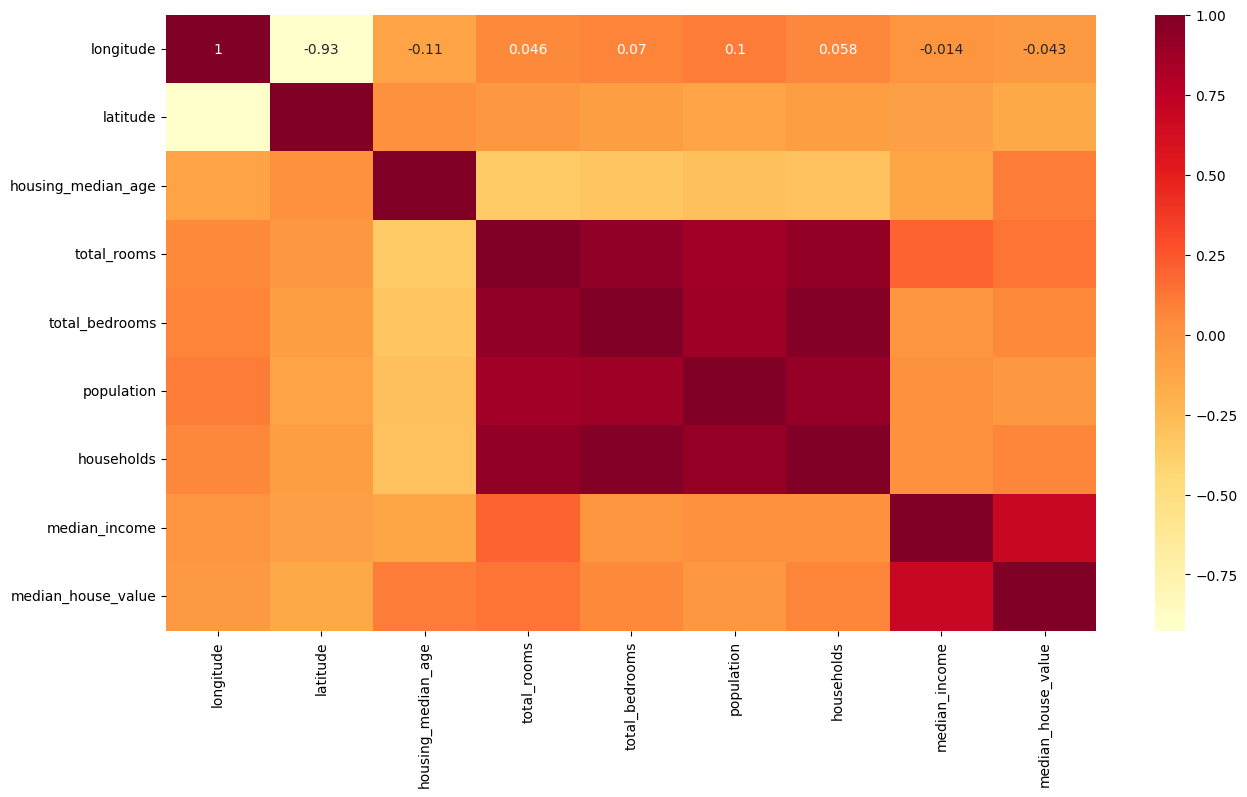

In [74]:
#Create heatmap using correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

In [75]:
#Pre-Procesing 
#See distributution by taking the logerithm of columns
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

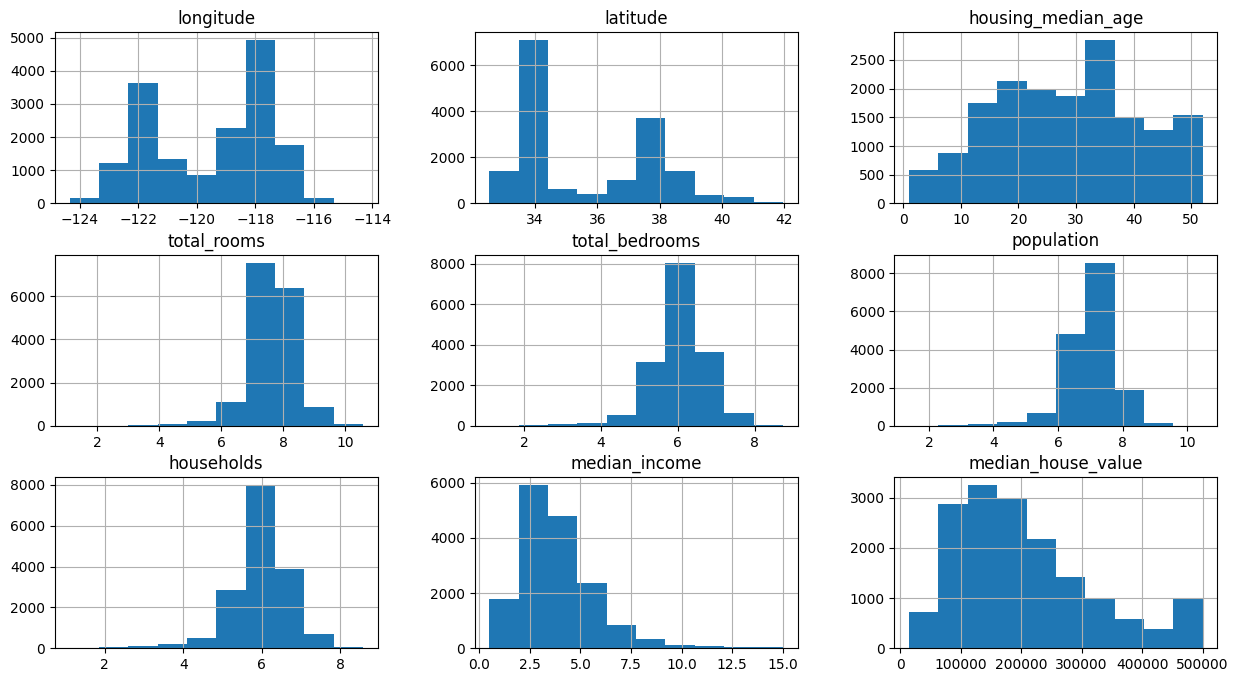

In [76]:
train_data.hist(figsize=(15, 8))

In [77]:
train_data.ocean_proximity.value_count()

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [92]:
#Turn string values into binary values
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20019,False,True,False,False,False
13467,False,True,False,False,False
17921,True,False,False,False,False
19812,False,True,False,False,False
20100,False,True,False,False,False
...,...,...,...,...,...
430,False,False,False,True,False
17068,False,False,False,True,False
8562,True,False,False,False,False
11306,True,False,False,False,False


In [95]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20019,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,99200.0,False,True,False,False,False
13467,-117.39,34.12,7.0,5059.0,780.0,3253.0,801.0,4.9196,140500.0,False,True,False,False,False
17921,-121.99,37.35,25.0,1527.0,325.0,707.0,339.0,4.3750,212200.0,True,False,False,False,False
19812,-118.94,36.32,10.0,2271.0,398.0,986.0,358.0,4.0703,147100.0,False,True,False,False,False
20100,-120.23,37.96,52.0,1230.0,262.0,609.0,243.0,2.0057,68200.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,-122.28,37.88,52.0,1172.0,215.0,489.0,218.0,3.9167,235600.0,False,False,False,True,False
17068,-122.24,37.55,3.0,6164.0,1175.0,2198.0,975.0,6.7413,435900.0,False,False,False,True,False
8562,-118.41,33.92,38.0,1437.0,272.0,590.0,250.0,5.2338,358000.0,True,False,False,False,False
11306,-117.94,33.78,11.0,2880.0,745.0,1806.0,722.0,3.8056,171100.0,True,False,False,False,False


In [96]:
#create correlation matrix
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924864,-0.113429,0.045564,0.071010,0.101826,0.058458,-0.017335,-0.044359,0.323006,-0.056659,0.009436,-0.475815,0.045807
latitude,-0.924864,1.000000,0.015250,-0.036024,-0.067963,-0.109962,-0.073473,-0.077540,-0.145106,-0.448730,0.352151,-0.016624,0.358933,-0.160414
housing_median_age,-0.113429,0.015250,1.000000,-0.361974,-0.323944,-0.296866,-0.305858,-0.111185,0.111440,0.042432,-0.236396,0.014154,0.258709,0.022557
total_rooms,0.045564,-0.036024,-0.361974,1.000000,0.931417,0.855129,0.920447,0.198664,0.134654,0.001153,0.022562,-0.008964,-0.026321,-0.007981
total_bedrooms,0.071010,-0.067963,-0.323944,0.931417,1.000000,0.874866,0.979631,-0.006181,0.050995,0.021703,-0.011331,-0.005904,-0.020749,0.003322
population,0.101826,-0.109962,-0.296866,0.855129,0.874866,1.000000,0.904734,0.006708,-0.024939,0.076750,-0.024153,-0.011836,-0.063422,-0.020141
households,0.058458,-0.073473,-0.305858,0.920447,0.979631,0.904734,1.000000,0.014940,0.065174,0.044948,-0.042569,-0.010666,-0.012307,0.004614
median_income,-0.017335,-0.077540,-0.111185,0.198664,-0.006181,0.006708,0.014940,1.000000,0.688627,0.173807,-0.236418,-0.009451,0.054926,0.020072
median_house_value,-0.044359,-0.145106,0.111440,0.134654,0.050995,-0.024939,0.065174,0.688627,1.000000,0.258624,-0.482823,0.022406,0.160514,0.136493
<1H OCEAN,0.323006,-0.448730,0.042432,0.001153,0.021703,0.076750,0.044948,0.173807,0.258624,1.000000,-0.607661,-0.013909,-0.314198,-0.341891


<Axes: >

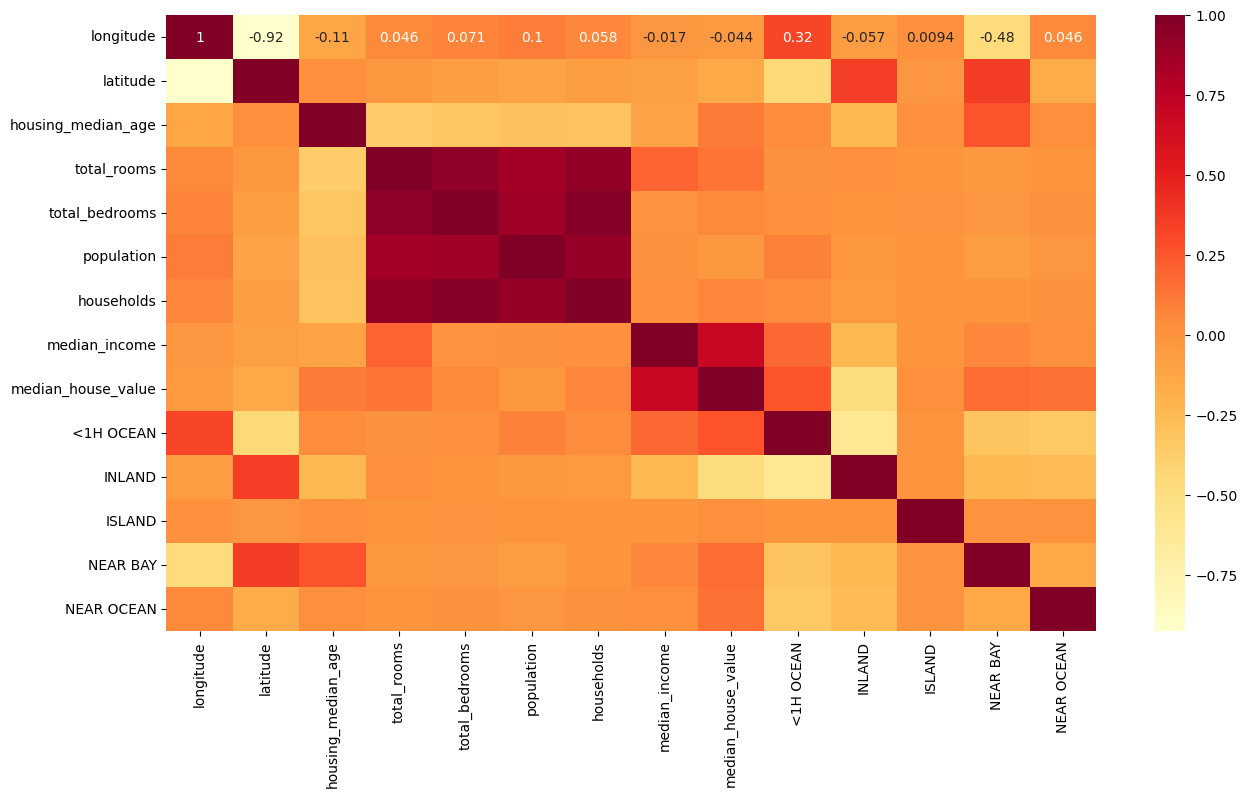

In [97]:
#Create heatmap using correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

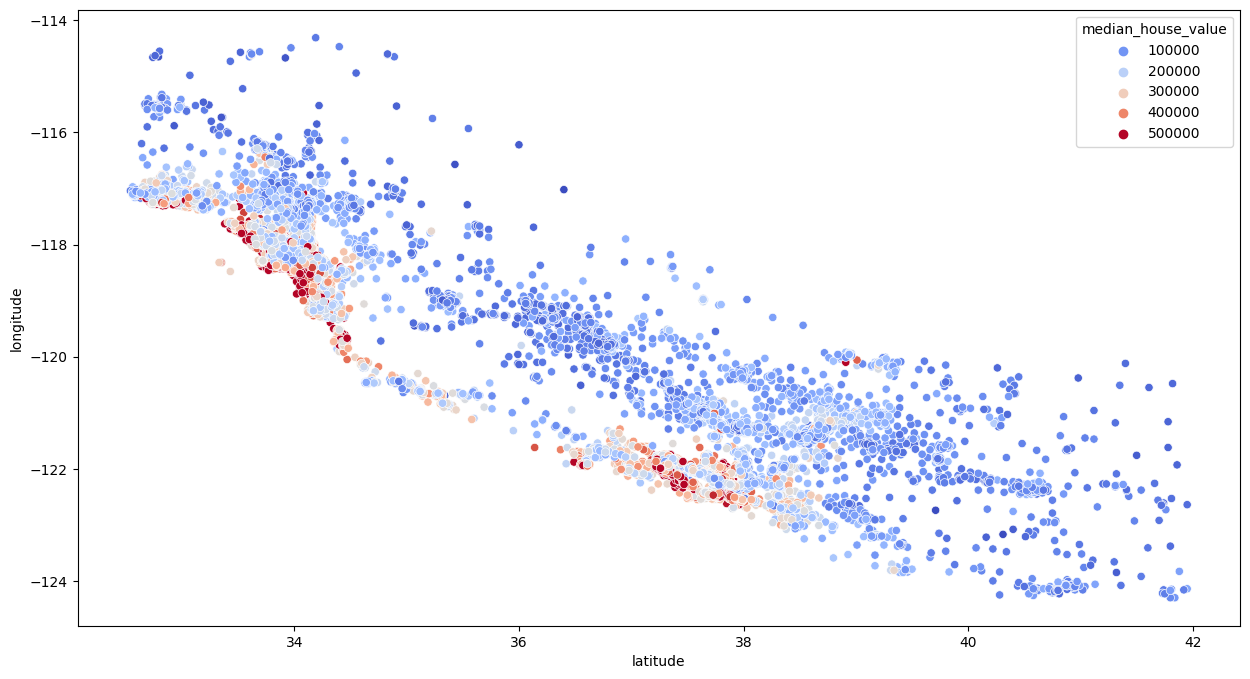

In [100]:
#visualise house prices. As you can see the closer you get the to the coast the more expensive the houses (as shown by the red dots)
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [101]:
#feature engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

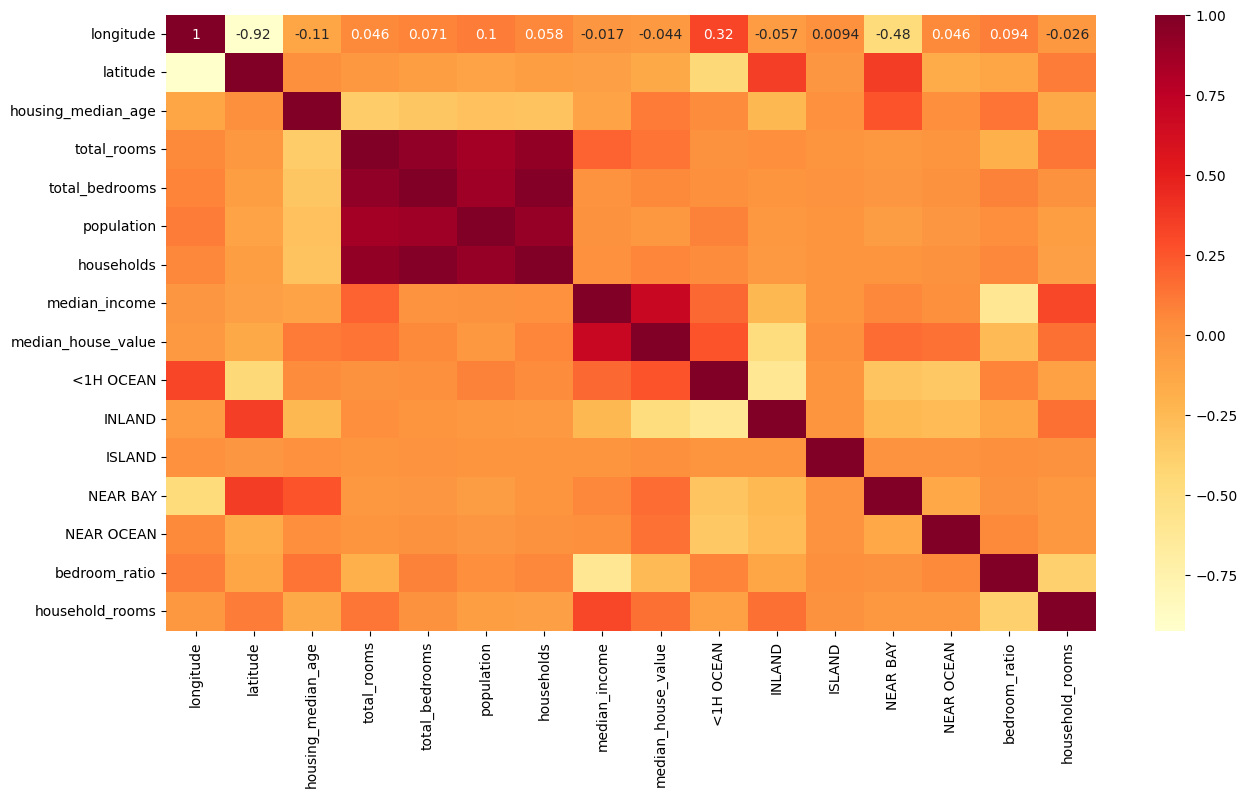

In [102]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

In [110]:
#train simple models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [105]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [108]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [112]:
X_test_s = scaler.transform(X_test)

In [113]:
reg.score(X_test,y_test)

C:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-4.573999459452262e+24

In [118]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)



RandomForestRegressor()

In [119]:
forest.score(X_test_s,y_test)

0.6158087226775056

In [136]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [137]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=300)

In [138]:
best_estimator.score(X_test_s, y_test)

0.7045488027130036